In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
p = cogsworth.pop.Population(20)
p.create_population(with_timing=False)
p

<Population - 24 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [4]:
# you can list out the bin_nums like this
p.bin_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [5]:
p_small = p[[4, 2]]
p_small

<Population - 2 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

We can also do usual slicing things, like getting every other binary between 2 and 10

In [6]:
p_every_other = p[2:10:2]
p_every_other.bin_nums

array([2, 4, 6, 8])

In [7]:
mask = np.repeat(False, len(p))
mask[:5] = True
print(mask)
p_masked = p[mask]
p_masked

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False]


<Population - 5 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [8]:
p = cogsworth.pop.Population(100, final_kstar1=[13, 14])
p.create_population()

Run for 100 binaries
Ended up with 100 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[0.4s] Evolve binaries (run COSMIC)


109it [00:00, 304.04it/s]                                                                                                                                                                                


[0.7s] Get orbits (run gala)
Overall: 1.2s


Now to get the classes for each source we just need to access ``p.classes``

In [9]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2,pisn-1,pisn-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


This gives us a huge table of booleans, which indicate whether a source is a part of a particular class. Each source can therefore have multiple classes (e.g. all `dco`s will also have `co-1` and `co-2`).

We can summarise this as totals by running the following

In [10]:
p.classes.sum()

dco                     2
co-1                   11
co-2                    7
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             0
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             0
widow-1                 0
widow-2                 0
stellar-merger-co-1     8
stellar-merger-co-2    18
pisn-1                  0
pisn-2                  0
dtype: int64

In [11]:
cogsworth.classify.list_classes()

Any class with a suffix '-1' or '-2' applies to only the primary or secondary
Available classes
-----------------
Theory Runaway (runaway-t)
    Any star from a disrupted binary that has an instantaneous velocity > 30 km/s in the frame of the binary

Observation runaway (runaway-o)
    Any star from a disrupted binary that is moving with a Galactocentric velocity > 30km/s relative to the local circular velocity at its location

Theory Runaway (walkaway-t)
    Any star from a disrupted binary that has an instantaneous velocity < 30 km/s in the frame of the binary

Observation walkaway (walkaway-o)
    Any star from a disrupted binary that is moving with a Galactocentric velocity < 30km/s relative to the local circular velocity at its location

Widowed Star (widow)
    Any star, or binary containing a star, that is/was a companion to a compact object

X-ray binary (xrb)
    Any binary with a star that is a companion to a compact object

Compact object (co)
    Any compact object or binar

Okay as an example, let's select just the sources that have a primary that is a compact object. Each column of the classes table is a boolean array that we can apply as a mask to the population.

In [12]:
p.classes["co-1"].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [13]:
co1_pop = p[p.classes["co-1"]]

Let's check out the `final_bpp` table to confirm that we've selected the right things.

In [14]:
co1_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
17,1049.783298,2.287836,1.879660,13.0,13.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,1039.775447,1037.562316,1.000000e+10,1.000000e+10,2.287836,1.879660,0.000014,0.000014,18.398191,16.025527,3.220813e-08,2.835534e-08,20758.548017,20107.787882,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.792008e+06,2.387322e+07,5.132672e+12,1.030666e+12,0.0,0.0,0.0,0.0,10.007851,12.220981,0.0,0.0,17,0.016720
35,7696.091000,8.951838,0.986685,14.0,11.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,7688.820712,7550.171723,1.000000e+10,1.000000e+10,8.951838,0.986685,0.000038,0.008208,27.421047,0.986685,1.000000e-10,4.151019e-05,2975.983899,5136.782455,0.000038,0.008208,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,7.163636e-06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,7.270288,145.919277,0.0,0.0,35,0.007232
39,8881.009909,3.779164,0.794482,14.0,11.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,8867.956902,8152.648764,1.000000e+10,1.000000e+10,3.779164,0.794482,0.000016,0.010375,17.251085,0.794482,1.000000e-10,1.171546e-05,4580.246102,3330.198230,0.000016,0.010375,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,5.568515e-06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,13.053007,728.361145,0.0,0.0,39,0.000660
41,11681.479655,8.687852,17.002146,14.0,14.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,11675.848615,11673.709944,1.000000e+10,1.000000e+10,8.687852,17.002146,0.000037,0.000072,11.999775,17.530580,1.000000e-10,1.000000e-10,3020.859173,2159.408501,0.000037,0.000072,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.631040,7.769711,0.0,0.0,41,0.003871
48,2934.659469,25.530566,20.516796,14.0,14.0,832.971328,4.105961e+02,0.010863,3.301219e-07,2.931559e-07,10.0,2930.813291,2928.129461,1.000000e+10,1.000000e+10,25.530566,20.516796,0.000108,0.000087,25.987776,21.016796,1.000000e-10,1.000000e-10,1762.205128,1965.766439,0.000108,0.000087,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.593075e+00,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,3.846178,6.530008,0.0,0.0,48,0.003244
52,10825.062652,1.957348,1.277584,13.0,13.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,10810.387600,10802.761719,1.000000e+10,1.000000e+10,1.957348,1.277584,0.000014,0.000014,15.219835,11.522769,2.683893e-10,2.019488e-10,6271.867480,5841.385957,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.789028e+07,4.985219e+07,1.929601e+10,1.462833e+10,0.0,0.0,0.0,0.0,14.675052,22.300933,0.0,0.0,52,0.006408
54,11480.393915,1.277584,1.304709,13.0,12.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,11455.987144,11415.620902,1.000000e+10,1.000000e+10,1.277584,1.304709,0.000014,0.003146,3.517814,1.304709,1.795750e-10,7.928301e-06,5672.402528,5485.392668,0.000014,0.003146,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.616029e+05,3.688412e-05,1.249126e+12,0.000000e+00,0.0,0.0,0.0,0.0,24.406771,64.773013,0.0,0.0,54,0.004532
58,616.497549,1.277584,4.491624,13.0,14.0,-1.000000,-1.000000e+00,-1.000000,1.000000e-04,1.000000e-04,10.0,597.914548,592.841165,1.000000e+10,1.000000e+10,1.277584,4.491624,0.000014,0.000019,3.149365,19.612447,6.592234e-08,1.000000e-10,24829.257952,4201.312488,0.000014,0.000019,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.113183e+07,2.000000e+08,3.192417e+12,0.000000e+00,0.0,0.0,0.0,0.0,18.583001,23.656383,0.0,0.0,58,0.007911
83,3635.269529,21.354676,21.303627,14.0,14.0,197931.872917,1.562586e+06,0.657746,3.525410e-09,3.520831e-09,10.0,3631.107929,3631.08529

You can see that the `kstar_1` column is always either 13 (neutron star) or 14 (black hole), nice!

In [15]:
custom_mask = p.disrupted & p.classes["co-2"]
custom_pop = p[custom_mask]
custom_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
17,1049.783298,2.287836,1.879660,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1039.775447,1037.562316,1.000000e+10,1.000000e+10,2.287836,1.879660,0.000014,0.000014,18.398191,16.025527,3.220813e-08,2.835534e-08,20758.548017,20107.787882,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.792008e+06,2.387322e+07,5.132672e+12,1.030666e+12,0.0,0.0,0.0,0.0,10.007851,12.220981,0.0,0.0,17,0.016720
41,11681.479655,8.687852,17.002146,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11675.848615,11673.709944,1.000000e+10,1.000000e+10,8.687852,17.002146,0.000037,0.000072,11.999775,17.530580,1.000000e-10,1.000000e-10,3020.859173,2159.408501,0.000037,0.000072,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.631040,7.769711,0.0,0.0,41,0.003871
52,10825.062652,1.957348,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10810.387600,10802.761719,1.000000e+10,1.000000e+10,1.957348,1.277584,0.000014,0.000014,15.219835,11.522769,2.683893e-10,2.019488e-10,6271.867480,5841.385957,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.789028e+07,4.985219e+07,1.929601e+10,1.462833e+10,0.0,0.0,0.0,0.0,14.675052,22.300933,0.0,0.0,52,0.006408
58,616.497549,1.277584,4.491624,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,597.914548,592.841165,1.000000e+10,1.000000e+10,1.277584,4.491624,0.000014,0.000019,3.149365,19.612447,6.592234e-08,1.000000e-10,24829.257952,4201.312488,0.000014,0.000019,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.113183e+07,2.000000e+08,3.192417e+12,0.000000e+00,0.0,0.0,0.0,0.0,18.583001,23.656383,0.0,0.0,58,0.007911
85,4421.457080,5.815294,7.941339,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,4415.881669,4413.311662,1.000000e+10,1.000000e+10,5.815294,7.941339,0.000025,0.000034,10.198072,11.627206,1.000000e-10,1.000000e-10,3692.332862,3159.656087,0.000025,0.000034,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.575411,8.145417,0.0,0.0,85,0.011076


Okay let's be more specific, we also want it to be specifically a neutron star of at least 1.2 solar masses - you can just keep stringing together the conditions!

In [16]:
custom_mask = p.disrupted & p.classes["co-2"]\
    & (p.final_bpp["kstar_2"] == 13) & (p.final_bpp["mass_2"] > 1.2)
custom_pop = p[custom_mask]
custom_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
17,1049.783298,2.287836,1.879660,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1039.775447,1037.562316,1.000000e+10,1.000000e+10,2.287836,1.879660,0.000014,0.000014,18.398191,16.025527,3.220813e-08,2.835534e-08,20758.548017,20107.787882,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.792008e+06,2.387322e+07,5.132672e+12,1.030666e+12,0.0,0.0,0.0,0.0,10.007851,12.220981,0.0,0.0,17,0.016720
52,10825.062652,1.957348,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10810.387600,10802.761719,1.000000e+10,1.000000e+10,1.957348,1.277584,0.000014,0.000014,15.219835,11.522769,2.683893e-10,2.019488e-10,6271.867480,5841.385957,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.789028e+07,4.985219e+07,1.929601e+10,1.462833e+10,0.0,0.0,0.0,0.0,14.675052,22.300933,0.0,0.0,52,0.006408


In [17]:
# get every row of evolutionary history matching condition
rev_mr_rows = p.bpp[(p.bpp["mass_2"] > p.bpp["mass_1"])
                    & (p.bpp["kstar_1"] < 7)
                    & (p.bpp["kstar_2"] < 7)]

# get unique binary numbers matching mask
rev_mr_bin_nums = rev_mr_rows["bin_num"].unique()

# mask the population
custom_pop = p[rev_mr_bin_nums]

Let's look at the evolution history of the first binary in this bunch to confirm we masked the right things

In [18]:
custom_pop.bpp.loc[custom_pop.bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
2,0.000000,7.729706,6.942433,1.0,1.0,218.813443,97.934664,0.404552,0.073899,0.072863,1.0,0.000000,0.000000,3.802922e+01,4.825371e+01,0.000000,0.000000,3.738305,3.509334,7.729706,6.942433,2488.384271,1.726722e+03,21179.298998,1.995092e+04,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2900.754452,3.101782e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2
2,38.479004,7.613712,6.899429,2.0,1.0,221.208465,100.090777,0.404550,0.172535,0.128815,2.0,39.301401,38.806469,3.930140e+01,4.893774e+01,1.489465,0.000000,8.805824,6.285096,7.613712,6.899429,7432.990391,3.151136e+03,18141.596206,1.732728e+04,0.273553,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,576.462199,9.207626e+02,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.822398,-0.327466,0.0,0.0,2
2,38.553965,7.612917,6.899320,2.0,1.0,131.725436,45.994876,0.000000,1.000999,0.129100,3.0,39.385336,38.882830,3.931036e+01,4.893951e+01,1.508199,0.000000,51.090651,6.299485,7.612917,6.899320,4495.385526,3.156549e+03,6641.873920,1.731491e+04,0.275964,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,49.894049,4.989405e+01,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.831371,-0.328865,0.0,0.0,2
2,38.597302,6.789027,7.722892,3.0,1.0,126.957414,43.520797,0.000000,3.171910,0.121765,2.0,39.800744,27.076374,3.968131e+01,3.810207e+01,1.510269,0.000000,148.119413,6.030956,7.580264,7.722892,3319.906850,4.303581e+03,3616.138819,1.912203e+04,0.276230,0.000000,2.639379e+00,1.000000e-10,9.609807e+01,1.000000e-10,39.088488,3.711696e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-1.203442,11.520927,0.0,0.0,2
2,38.597302,6.789027,7.722892,3.0,1.0,126.957414,43.520797,0.000000,3.171910,0.121765,7.0,39.800744,27.076374,3.968131e+01,3.810207e+01,1.510269,0.000000,148.119413,6.030956,7.580264,7.722892,3319.906850,4.303581e+03,3616.138819,1.912203e+04,0.276230,0.000000,2.639379e+00,1.000000e-10,9.609807e+01,1.000000e-10,39.088488,3.711696e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-1.203442,11.520927,0.0,0.0,2
2,38.597302,1.510269,7.722892,7.0,1.0,20.974925,3.663934,0.000000,3.171910,0.121765,8.0,0.000000,27.076374,3.968131e+01,3.810207e+01,0.000000,0.000000,148.119413,6.030956,1.510269,7.722892,3319.906850,4.303581e+03,3616.138819,1.912203e+04,0.276230,0.000000,2.639379e+00,1.000000e-10,9.609807e+01,1.000000e-10,39.088488,3.711696e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-1.203442,11.520927,0.0,0.0,2
2,38.597302,1.510269,7.722892,7.0,1.0,20.974925,3.663934,0.000000,0.052639,0.550110,4.0,0.000000,27.076374,8.246600e+00,3.810207e+01,0.000000,0.000000,0.276230,6.030956,1.510269,7.722892,983.978466,4.303581e+03,61784.668794,1.912203e+04,0.000000,0.000000,1.510269e+00,1.000000e-10,2.762298e-01,1.000000e-10,3.885218,3.711696e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,38.597302,11.520927,0.0,0.0,2
2,47.223546,1.435693,7.682618,8.0,1.0,25.948575,5.073238,0.000000,0.041580,0.655323,2.0,9.201970,36.064607,9.201965e+00,3.853736e+01,0.617248,0.000000,0.266557,8.954166,1.435693,7.682618,1825.521552,5.587173e+03,73404.334269,1.675155e+04,0.062739,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,219.710461,8.491653e+02,0.0,0.000000e+00,0.0,0.0,0.0,0.0,38.021576,11.158939,0.0,0.0,2
2,47.988779,1.402078,7.685871,8.0,1.0,26.371630,5.206486,0.000000,1.000295,0.680533,3.0,9.967203,36.795621,9.201965e+00,3.850190e+01,0.851765,0.000000,6.473601,9.487185,1.435693,7.685871,9134.531664,5.749345e+03,22277.591271,1.639100e+04,0.048604,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,440.771528,4.407715e+02,0.0,0.000000e+00,0.0,0.0,0.0,0.0,38.021576,11.193159,0.0,0.0,2
2,48.051791,0.908076,8.179420,8.0,1.0,36.541691,8.492450,0.000000,0.040339,0.409812,4.0,10.030215,30.351334,9.201965e+00,3.36

In [19]:
big_kick_nums = p.kick_info[p.kick_info["natal_kick"] > 500]["bin_num"].unique().astype(int)
p_big_kick = p[big_kick_nums]
p_big_kick.kick_info

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
17,1.0,1.0,678.193712,6.864777,69.556450,0.0,-52.257768,268.032757,-615.019129,672.919729,9.489093,-2.656082,-2.301982,10.119129,0.0,0.0,-1.355522e+09,17.0
17,2.0,1.0,96.774566,-33.522622,192.338955,0.0,0.000000,0.000000,0.000000,672.919729,52.210760,11.420978,80.677843,100.132267,0.0,0.0,4.545246e+08,17.0
31,2.0,0.0,513.500914,-51.345786,328.253932,0.0,434.611510,-158.769727,-222.684077,513.500914,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.028489e+09,31.0
31,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,31.0
52,1.0,1.0,818.668704,48.134848,279.806349,0.0,24.421585,368.424008,-411.561196,552.915257,-86.045028,7.302704,-18.148074,88.240745,0.0,0.0,-1.392409e+09,52.0
52,2.0,1.0,380.870668,-45.699650,125.305220,0.0,0.000000,0.000000,0.000000,552.915257,157.535440,-222.452306,266.007562,335.908552,0.0,0.0,2.822353e+07,52.0
53,2.0,0.0,513.510628,23.535674,61.141824,0.0,-417.691755,-296.198454,-38.642442,513.510628,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.903153e+09,53.0
53,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,53.0
76,2.0,0.0,564.084077,31.213528,243.404503,0.0,-346.130695,-442.318086,-52.336387,564.084077,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-7.985942e+08,76.0
76,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,76.0


In [20]:
p_init_mask = p[(p.initC["mass_1"] > 20) & (p.initial_galaxy.rho > 10 * u.pc)]
p_init_mask

<Population - 5 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [21]:
p = cogsworth.pop.Population(1000, final_kstar1=[13, 14])
p.create_population()

Run for 1000 binaries
Ended up with 1028 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[2.8s] Evolve binaries (run COSMIC)


1178it [00:04, 259.67it/s]                                                                                                                                                                               


[6.5s] Get orbits (run gala)
Overall: 9.3s


In [22]:
# get every system that had either a primary or secondary supernova
kicked = np.isin(p.bin_nums, p.bpp[(p.bpp["evol_type"] == 15) | (p.bpp["evol_type"] == 16)]["bin_num"].unique())

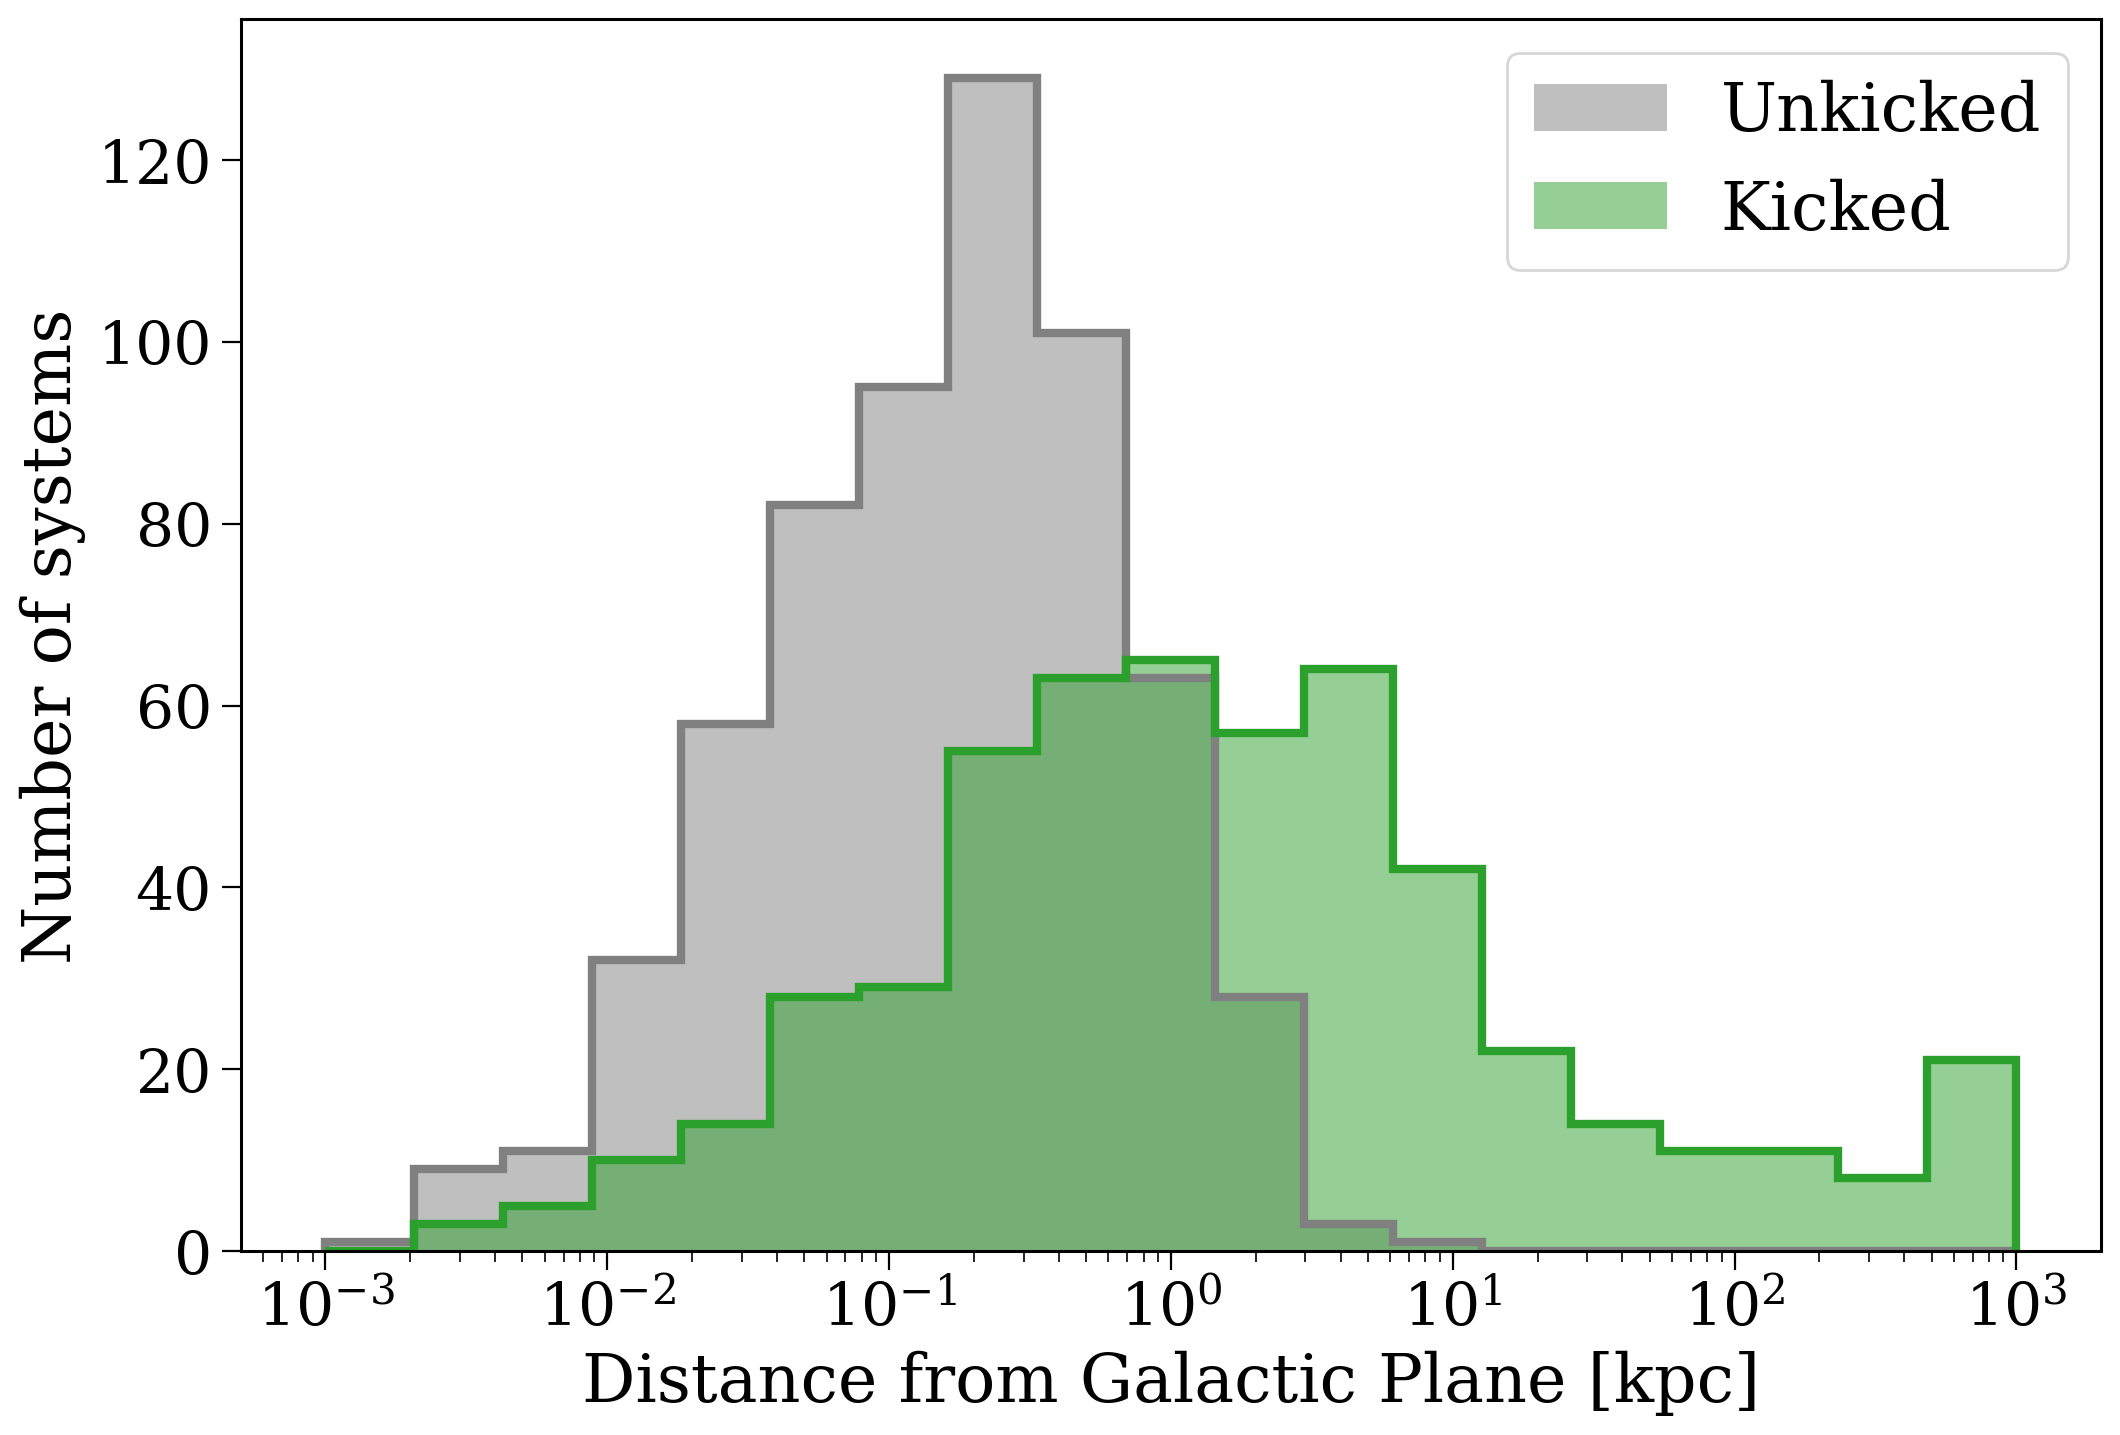

In [23]:
# split the population
p_kicked = p[kicked]
p_unkicked = p[~kicked]

fig, ax = plt.subplots()

# plot histograms for each
for pop, label, colour in zip([p_unkicked, p_kicked], ["Unkicked", "Kicked"], ["grey", "C2"]):
    ax.hist(abs(pop.final_pos[:, 2].value), bins=np.geomspace(1e-3, 1e3, 20),
            histtype="step", linewidth=3, color=colour)
    ax.hist(abs(pop.final_pos[:, 2].value), bins=np.geomspace(1e-3, 1e3, 20),
            alpha=0.5, color=colour, label=label)

ax.set(xscale="log", xlabel="Distance from Galactic Plane [kpc]", ylabel="Number of systems")
ax.legend()
plt.show()